# Clasificación de imágenes usando una red profunda
# Dataset de perros y gatos

**Profesor:** Roberto Muñoz <br />
**E-mail:** <rmunoz@metricarts.com> <br />

**Colaborador:** Sebastián Arpón <br />
**E-mail:** <rmunoz@metricarts.com> <br />


In [1]:
import tensorflow as tf
tf.enable_eager_execution()

import os
# os.environ('TF_CCP_MIN_LOG_LEVEL')='3' # ni idea que es esto

import glob
import matplotlib.pyplot as plt

In [2]:
def read_dir(directory):
    cats = glob.glob(os.path.join(directory,"cats") + '/*.jpg')
    dogs = glob.glob(os.path.join(directory,"dogs") + '/*.jpg')
    m_images = cats + dogs
    
    m_labels = []
    m_labels.extend([CAT] * len(cats))
    m_labels.extend([DOG] * len(dogs))
    assert len(m_labels) == len(m_images)
    LABELS_DIMENSIONS = 2
    m_labels = tf.one_hot(m_labels, LABELS_DIMENSIONS)
    print("Encontre %d imagenes y etiquetas en %s" %(len(m_images),directory))
    return m_images, m_labels

def load_image(path_to_image, p_label):
    m_label = p_label
    m_image = tf.read_file(path_to_image)
    m_image = tf.image.decode_jpeg(m_image)
    m_image = tf.image.resize_images(m_image,(150,150))
    m_image = m_image / 255
    return m_image, m_label

In [3]:
data_dir = "data/cats_and_dogs_small"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")
val_dir = os.path.join(data_dir , "validation")

CAT = 0
DOG = 1

print("Carpeta con imagenes para el entrenamiento: ", train_dir)
print("Carpeta con imagenes para la evaluación: ", test_dir)

train_images, train_labels = read_dir(train_dir)
test_images, test_labels = read_dir(test_dir)
val_images, val_labels = read_dir(val_dir)
print ("=============================================================")
print ("=============================================================")
print (test_images)
print ("=============================================================")
print ("=============================================================")
print (test_labels)

Carpeta con imagenes para el entrenamiento:  data/cats_and_dogs_small/train
Carpeta con imagenes para la evaluación:  data/cats_and_dogs_small/test
Encontre 102 imagenes y etiquetas en data/cats_and_dogs_small/train
Encontre 12 imagenes y etiquetas en data/cats_and_dogs_small/test
Encontre 20 imagenes y etiquetas en data/cats_and_dogs_small/validation
['data/cats_and_dogs_small/test/cats/cat.12478.jpg', 'data/cats_and_dogs_small/test/cats/cat.12479.jpg', 'data/cats_and_dogs_small/test/cats/cat.12498.jpg', 'data/cats_and_dogs_small/test/cats/cat.12467.jpg', 'data/cats_and_dogs_small/test/cats/cat.12465.jpg', 'data/cats_and_dogs_small/test/cats/cat.12477.jpg', 'data/cats_and_dogs_small/test/cats/cat.12488.jpg', 'data/cats_and_dogs_small/test/dogs/dog.23.jpg', 'data/cats_and_dogs_small/test/dogs/dog.21.jpg', 'data/cats_and_dogs_small/test/dogs/dog.24.jpg', 'data/cats_and_dogs_small/test/dogs/dog.14.jpg', 'data/cats_and_dogs_small/test/dogs/dog.10.jpg']
tf.Tensor(
[[ 1.  0.]
 [ 1.  0.]
 [ 

In [8]:
import numpy as np

<class 'EagerTensor'>
<class 'str'>
tf.Tensor([ 0.  1.], shape=(2,), dtype=float32)


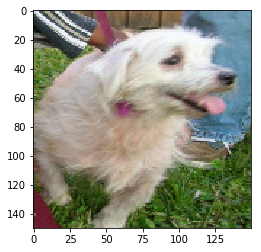

In [15]:
i=np.random.randint(len(train_images))

img, label = load_image(train_images[i],"")

print(type(img))
print(type(label))

plt.imshow(img)
print(train_labels[i])

In [16]:
batch_size = 10
buffer_size = 300

train_data_set = tf.data.Dataset.from_tensor_slices((train_images,train_labels))
train_data_set = train_data_set.shuffle(buffer_size).map(load_image).batch(batch_size)
val_data_set = tf.data.Dataset.from_tensor_slices((val_images,val_labels)).shuffle(buffer_size).map(load_image).batch(20)                                                

### Definimos la arquitectura de la red

In [17]:
help(tf.layers.Conv2D)

Help on class Conv2D in module tensorflow.python.layers.convolutional:

class Conv2D(_Conv)
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  (actually cross-correlated) with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True (and a `bias_initializer` is provided),
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  Arguments:
 |    filters: Integer, the dimensionality of the output space (i.e. the number
 |      of filters in the convolution).
 |    kernel_size: An integer or tuple/list of 2 integers, specifying the
 |      height and width of the 2D convolution window.
 |      Can be a single integer to specify the same value for
 |      all spatial dimensions.
 |    strides: An integer or tuple/list of 2 integers,
 |      specifying the strides of the convolution along the height and

In [18]:
tf.nn

Help on package tensorflow.tools.api.generator.api.nn in tensorflow.tools.api.generator.api:

NAME
    tensorflow.tools.api.generator.api.nn - Imports for Python API.

DESCRIPTION
    This file is MACHINE GENERATED! Do not edit.
    Generated by: tensorflow/tools/api/generator/create_python_api.py script.

PACKAGE CONTENTS
    rnn_cell (package)

DATA
    swish = <tensorflow.python.framework.function._OverloadedFunction obje...

FILE
    /Users/rmunoz/anaconda3/lib/python3.6/site-packages/tensorflow/tools/api/generator/api/nn/__init__.py




In [20]:
model = tf.keras.Sequential()

model.add(tf.layers.Conv2D(16,(5,5),activation=tf.nn.relu, input_shape=(150,150,3)))

model.add(tf.layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(tf.layers.Conv2D(64,(3,3),activation=tf.nn.relu))
model.add(tf.layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(tf.layers.Conv2D(128,(3,3),activation=tf.nn.relu))
model.add(tf.layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(tf.layers.Conv2D(128,(3,3),activation=tf.nn.relu))
model.add(tf.layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(tf.layers.Flatten())
model.add(tf.layers.Dense(512,activation=tf.nn.relu))
model.add(tf.layers.Dense(2,activation=tf.nn.softmax))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 146, 146, 16)      1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 64)        9280      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 33, 33, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       147584    
__________

### Usamos el AdamOptimizer como funcion de optimización

In [21]:
optimizer = tf.train.AdamOptimizer()

In [22]:
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [25]:
EPOCHS = 2
batch_loss_list=[]
val_loss_list=[]

for epoch in range(EPOCHS):
    for (batch,(images, labels)) in enumerate(train_data_set):
        batch_loss, batch_accuracy = model.train_on_batch(images.numpy(), labels.numpy())
        batch_loss_list.append(float(batch_loss))
        
        for (dummy,(val_im, val_lab)) in enumerate(val_data_set):
            val_loss, val_accuracy = model.evaluate(val_im.numpy(),val_lab.numpy())
            val_loss_list.append(float(val_loss))
            
        if batch%5 == 0:
            print('Entrenamiento Epoca #%d\t Loss: %.6f\t Accuracy:  %.6f\t'% (epoch+1, batch_loss, batch_accuracy))
            print('Validacion Epoca #%d\t Loss: %.6f\t Accuracy:  %.6f\t' % (epoch+1, val_loss, val_accuracy))

20/20 [==============================] - 0s 20ms/step
Entrenamiento Epoca #1	 Loss: 0.689966	 Accuracy:  0.800000	
Validacion Epoca #1	 Loss: 0.692668	 Accuracy:  0.500000	
20/20 [==============================] - 0s 20ms/step
Entrenamiento Epoca #1	 Loss: 0.685434	 Accuracy:  0.600000	
Validacion Epoca #1	 Loss: 0.691801	 Accuracy:  0.550000	
20/20 [==============================] - 0s 18ms/step
Entrenamiento Epoca #1	 Loss: 0.692936	 Accuracy:  0.500000	
Validacion Epoca #1	 Loss: 0.690675	 Accuracy:  0.550000	
20/20 [==============================] - 0s 22ms/step
Entrenamiento Epoca #2	 Loss: 0.675658	 Accuracy:  0.700000	
Validacion Epoca #2	 Loss: 0.690421	 Accuracy:  0.600000	
20/20 [==============================] - 0s 21ms/step
Entrenamiento Epoca #2	 Loss: 0.669384	 Accuracy:  0.600000	
Validacion Epoca #2	 Loss: 0.729379	 Accuracy:  0.500000	
20/20 [==============================] - 0s 19ms/step
Entrenamiento Epoca #2	 Loss: 0.681674	 Accuracy:  0.500000	
Validacion Epoca #2	

### Graficamos la evolución de la función de costo

Text(0.5,1,'Tain dataset')

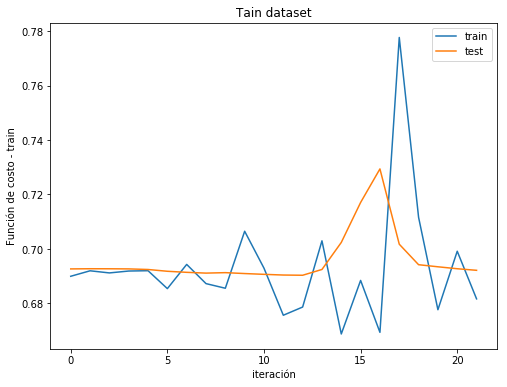

In [26]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(batch_loss_list, label="train")
ax.plot(val_loss_list, label="test")

plt.xlabel("iteración")
plt.ylabel("Función de costo - train")
plt.legend()

plt.title("Tain dataset")